# Client Classification

Tujuan dari klasifikasi ini adalah untuk memprediksi apakah seorang klien akan berlangganan deposito berjangka atau tidak

Data yang digunakan adalah data terkait kampanye pemsaran langsung dari lembaga perbankan Protugis.

### Import packages and libraries

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus
import seaborn as sns
import sklearn.tree as tree
from IPython.display import Image
from six import StringIO
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
plt.style.use("fivethirtyeight")

In [3]:
# !conda install pydotplus

### Load Data

In [4]:
dataset = pd.read_csv("./dataset/bank-additional-full.csv", sep=';')

### Preprocessing

In [5]:
dataset.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

Text(0.5, 1.0, 'Proporsi target label')

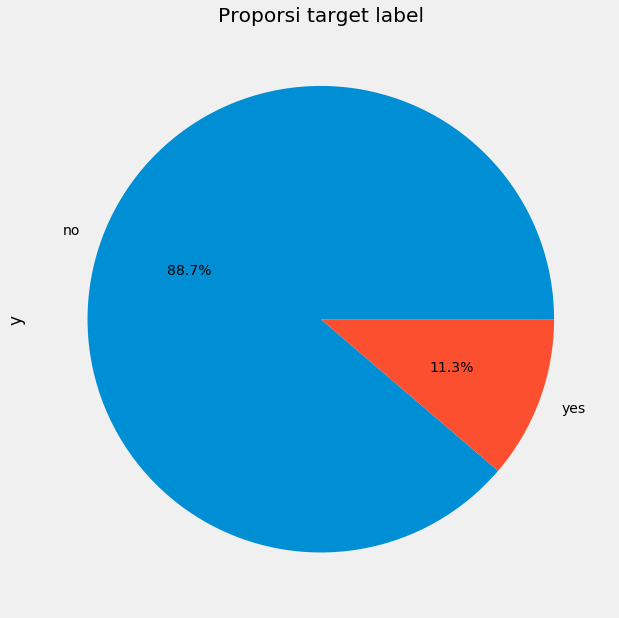

In [6]:
dataset['y'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(10,10)
)
plt.title("Proporsi target label")

In [7]:
print("shape : ", dataset.shape)
list(dataset.columns)

shape :  (41188, 21)


['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
# Missing Value
dataset.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [10]:
# Convert Categorical to Numeric
categorical = dataset.loc[:, dataset.dtypes == object]
numerical = dataset.loc[:, dataset.dtypes != object]

categorical = categorical.copy()
le = preprocessing.LabelEncoder()

for i in categorical:
    str_i = str(i)
    categorical[str_i] = le.fit_transform(categorical[str_i])

dataset_clean = pd.concat([numerical, categorical], axis=1)
dataset_clean.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  marital  education  default  \
0          -36.4      4.857       5191.0  ...        1          0        0   
1          -36.4      4.857       5191.0  ...        1          3        1   
2          -36.4      4.857       5191.0  ...        1          3        0   
3          -36.4      4.857       5191.0  ...        1          1        0   
4          -36.4      4.857       5191.0  ...        1          3        0   

   housing  loan  contact  month  day_of_week  poutcome  y  
0        0     0        1      6            1         1  0  
1        0     0        1      6            1         1  0  
2        2     0        1      6            1         1  0  
3        0     0        1      6            1         1  0  
4        0     2        1      6            1         1  0  

[5 rows x 21 columns]

In [11]:
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  int64  
 2   campaign        41188 non-null  int64  
 3   pdays           41188 non-null  int64  
 4   previous        41188 non-null  int64  
 5   emp.var.rate    41188 non-null  float64
 6   cons.price.idx  41188 non-null  float64
 7   cons.conf.idx   41188 non-null  float64
 8   euribor3m       41188 non-null  float64
 9   nr.employed     41188 non-null  float64
 10  job             41188 non-null  int32  
 11  marital         41188 non-null  int32  
 12  education       41188 non-null  int32  
 13  default         41188 non-null  int32  
 14  housing         41188 non-null  int32  
 15  loan            41188 non-null  int32  
 16  contact         41188 non-null  int32  
 17  month           41188 non-null 

In [12]:
dataset_clean.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  41188.000000    41188.000000   41188.000000  41188.000000   
mean       0.081886       93.575664     -40.502600      3.621291   
std        1.570960        0.578840       4.628198      1.734447   
min       -3.400000       92.201000     -50.800000      0.634000   
25%       -1.800000       93.075000     -42.700000      1.344000   
50%        1.100000       93.749000     -41.800000      4.857000   
75%        1.400000       93.994000     -36.400000      4.961000   
max        1.400000       94.767000     -26.900000      5.045000   

        nr.employed  ...       marital     education       default  \
count  41188.000000  ...  41188.000000  41188.000000  41188.000000   
mean    5167.035911  ...      1.172769      3.747184      0.208872   
std       72.251528  ...      0.608902      2.136482      0.406686   
min     4963.600000  ...      0.000000      0.000000      0.000000   
25%     5099.100000  ...      1.000000      2.000000      0.000000   
50%     5191.000000  ...      1.000000      3.000000      0.000000   
75%     5228.100000  ...      2.000000      6.000000      0.000000   
max     5228.100000  ...      3.000000      7.000000      2.000000   

            housing          loan       contact         month   day_of_week  \
count  41188.000000  41188.000000  41188.000000  41188.000000  41188.000000   
mean       1.071720      0.327425      0.365252      4.230868      2.004613   
std        0.985314      0.723616      0.481507      2.320025      1.397575   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      3.000000      1.000000   
50%        2.000000      0.000000      0.000000      4.000000      2.000000   
75%        2.000000      0.000000      1.000000      6.000000      3.000000   
max        2.000000      2.000000      1.000000      9.000000      4.000000   

           poutcome             y  
count  41188.000000  41188.000000  
mean       0.930101      0.112654  
std        0.362886      0.316173  
min        0.000000      0.000000  
25%        1.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      0.000000  
max        2.000000      1.000000  

[8 rows x 21 columns]

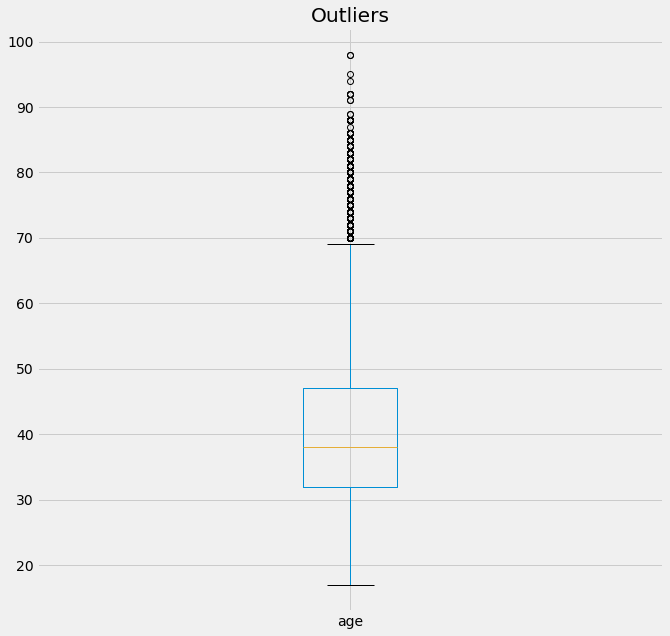

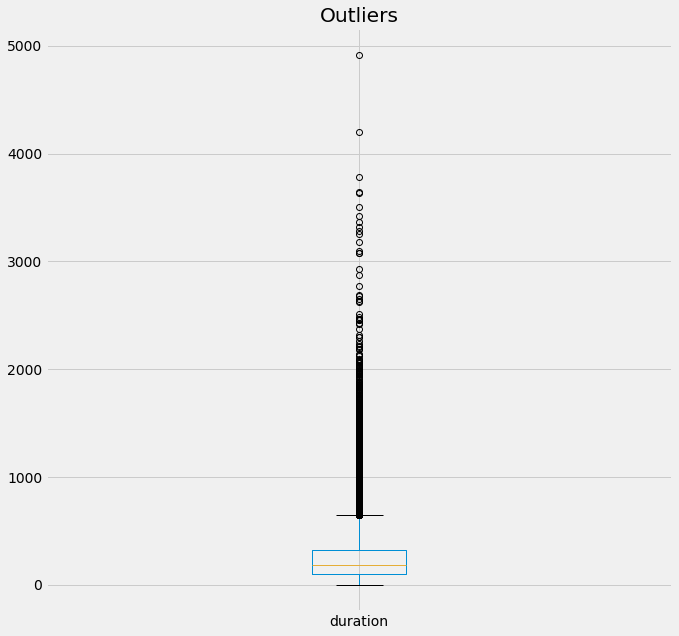

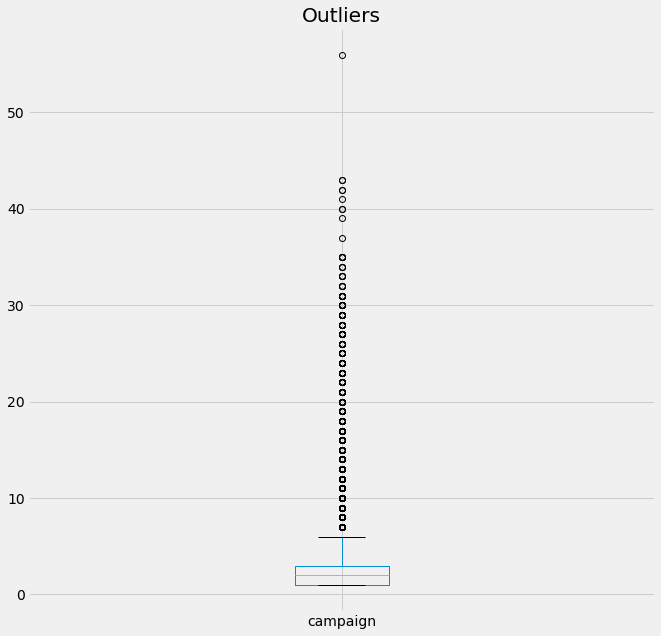

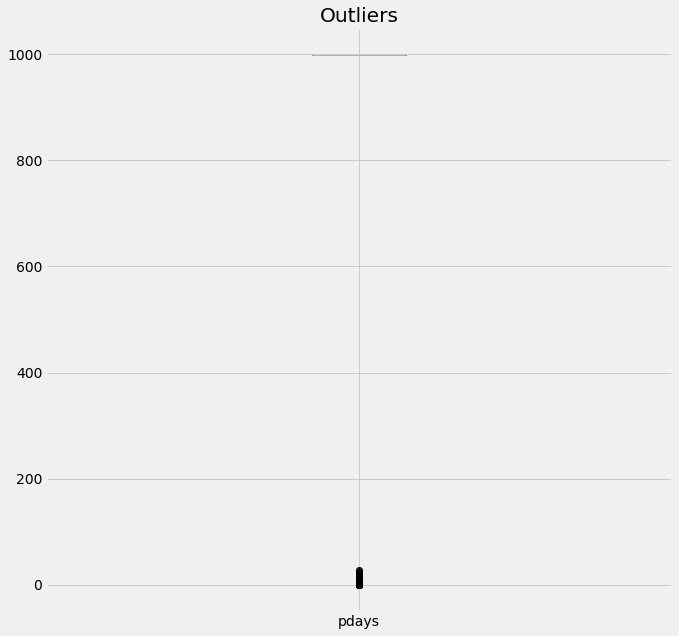

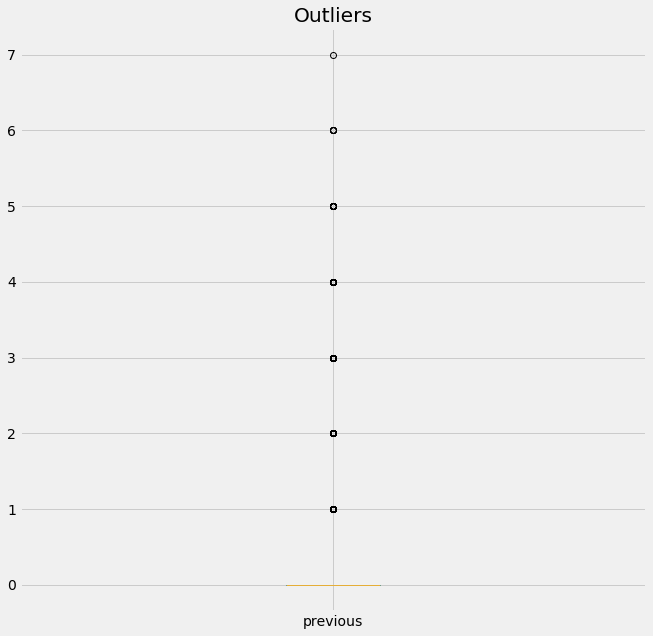

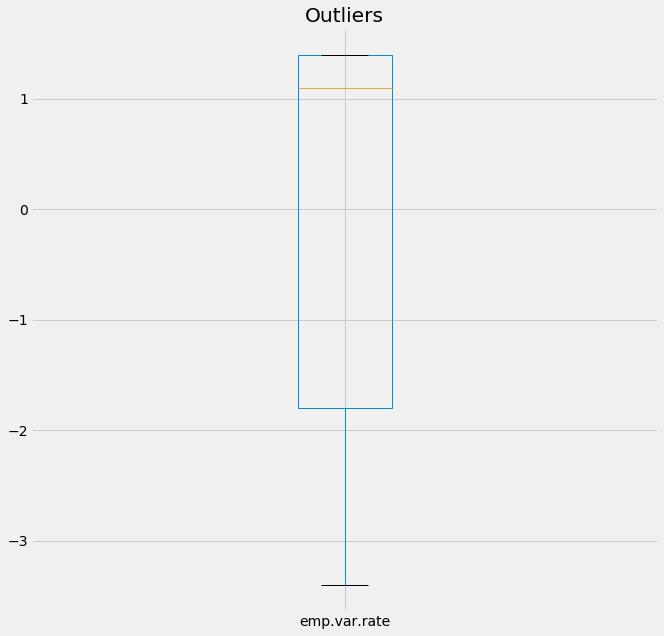

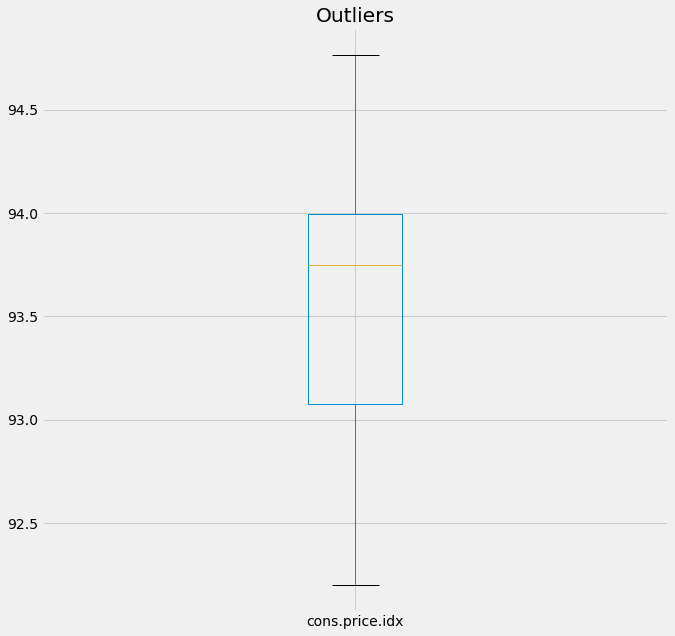

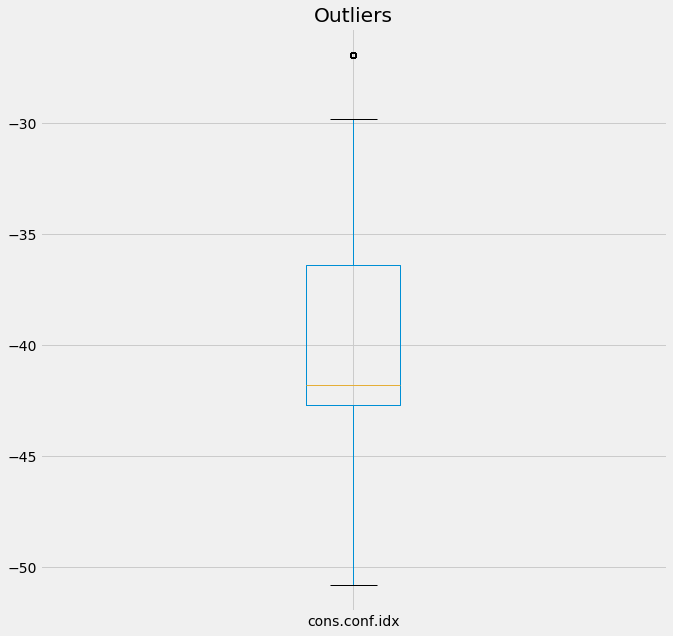

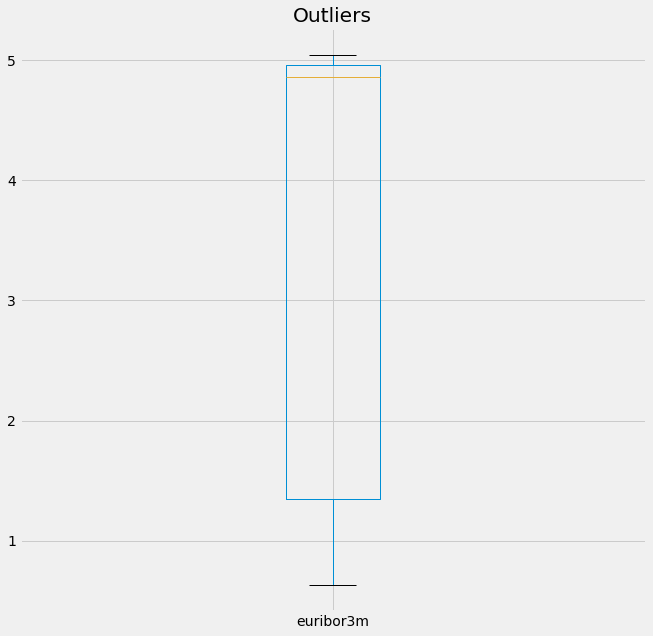

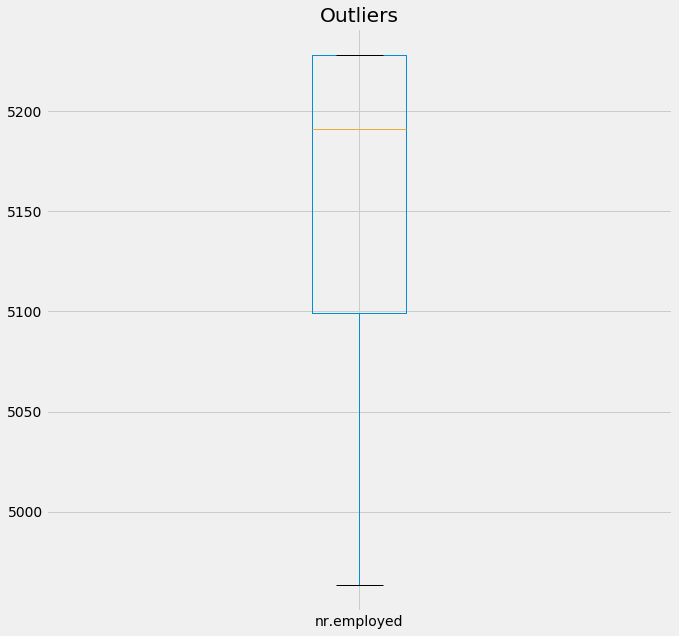

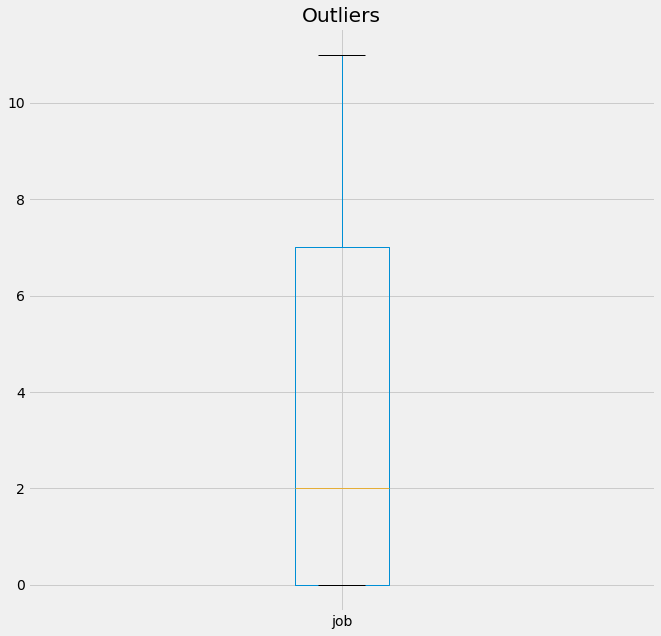

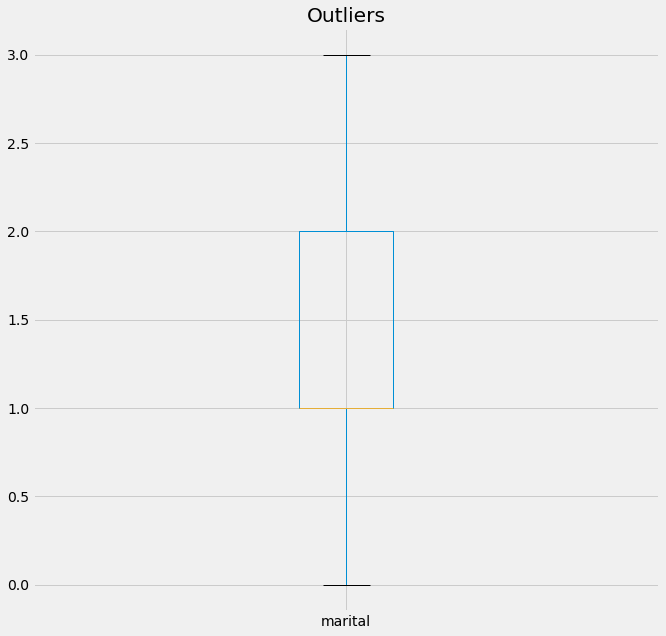

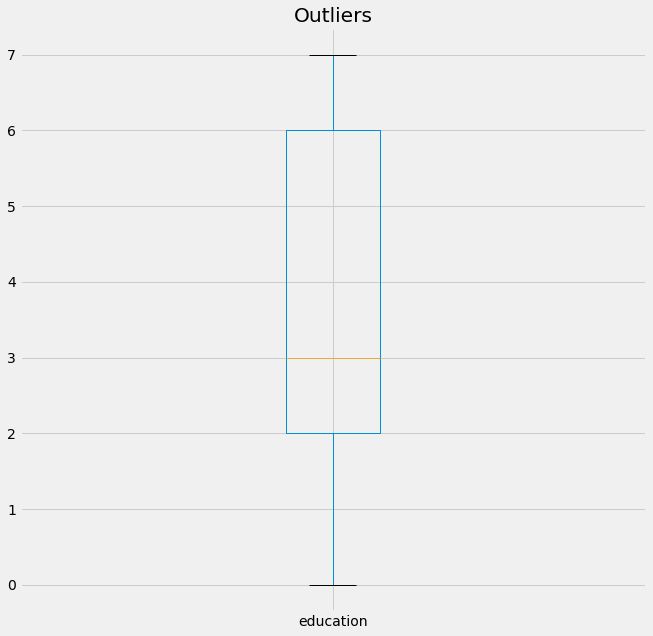

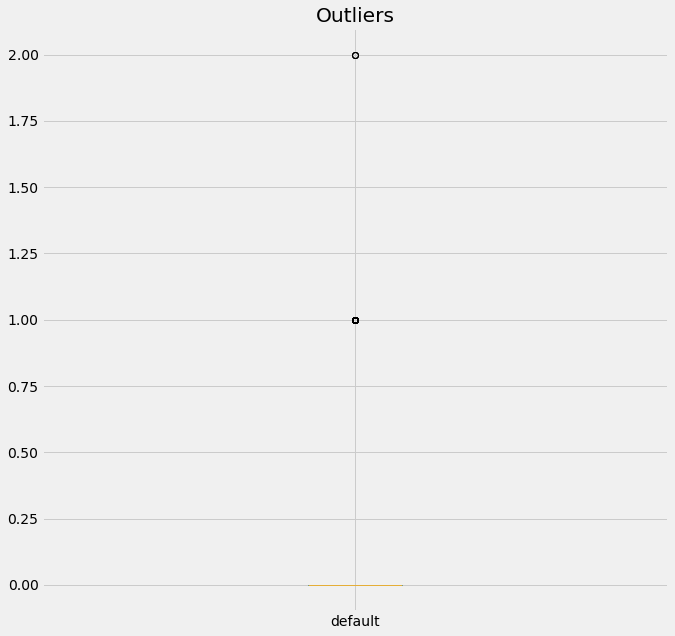

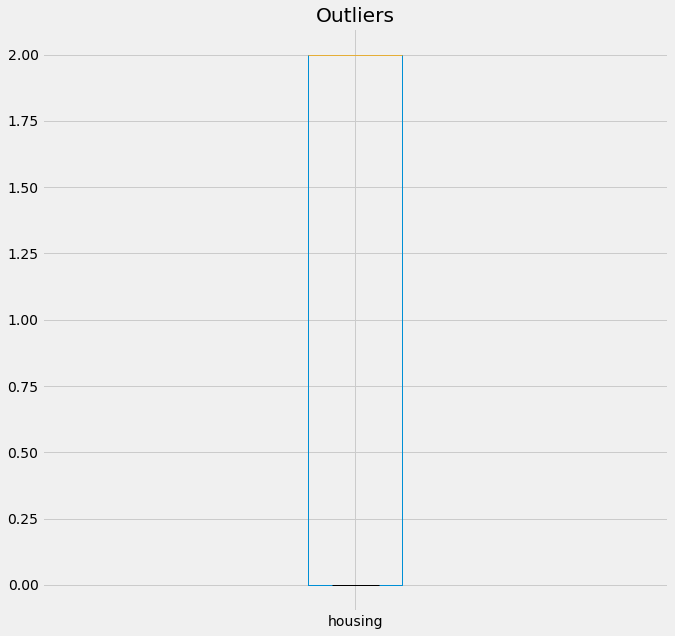

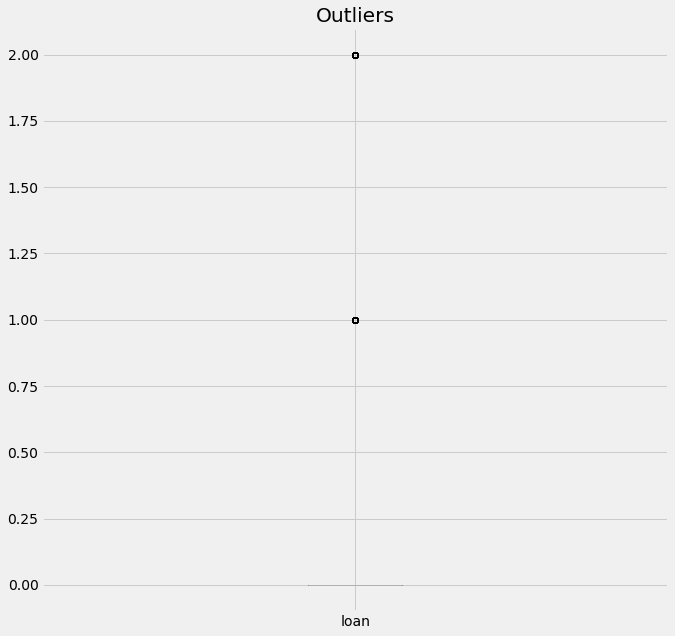

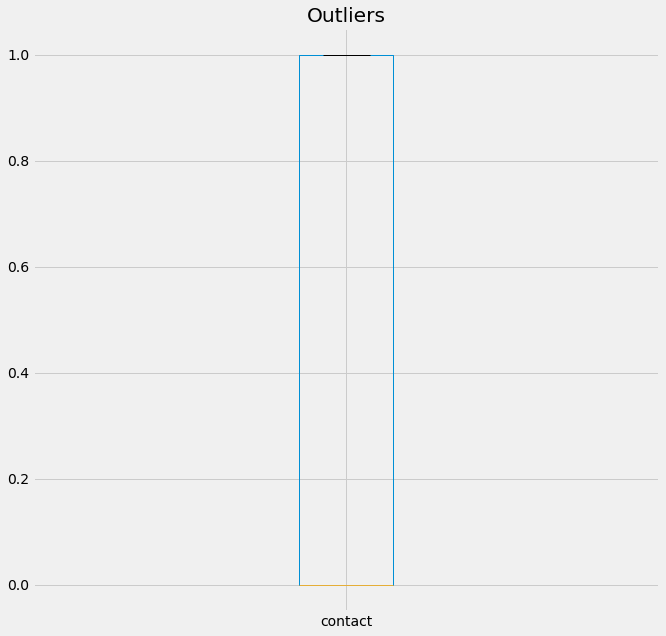

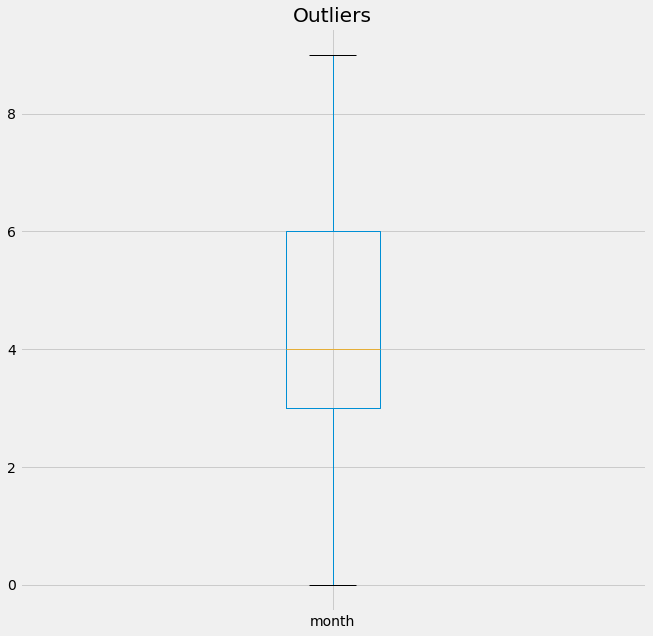

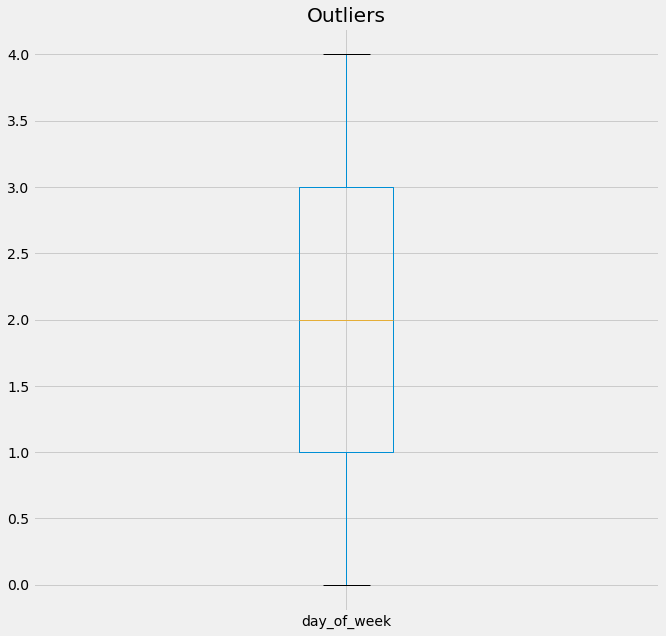

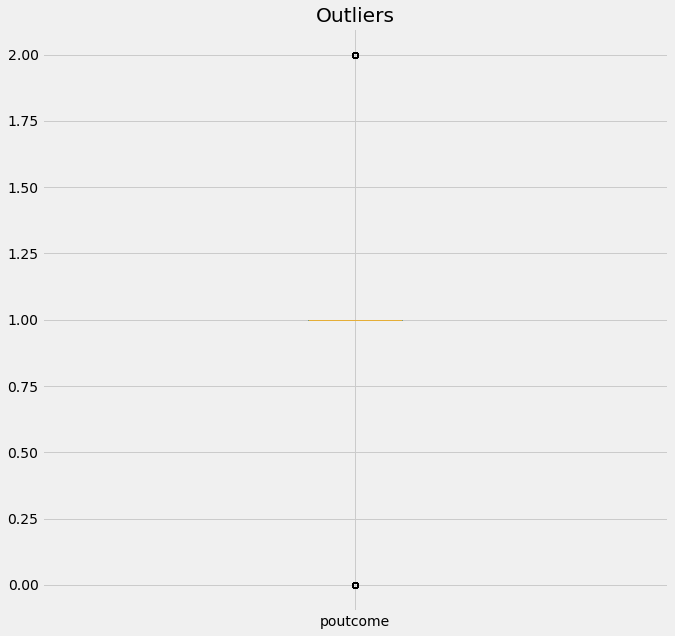

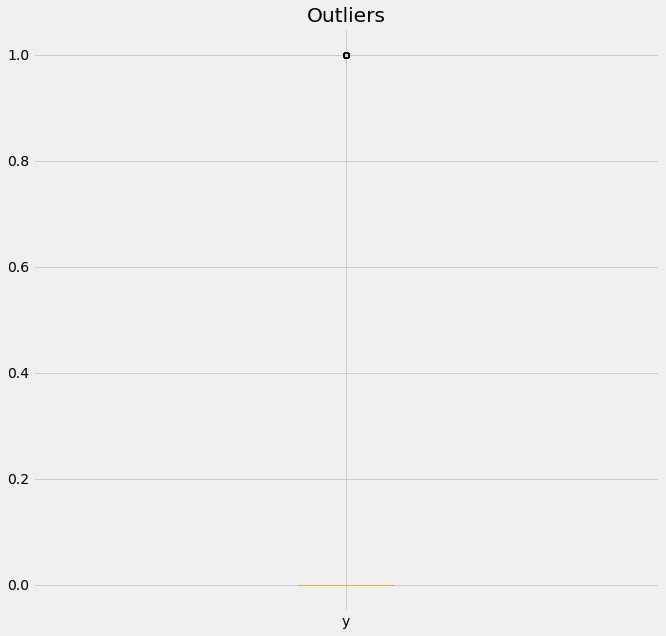

In [13]:
# Outliers
for i in dataset_clean:
    str_i = str(i)
    dataset_clean[str_i].plot(
        kind="box",
        figsize=(10,10)
    )
    plt.title("Outliers")
    plt.show()

In [14]:
# Split Dataset
x = dataset_clean.loc[:, dataset_clean.columns != 'y']
y = dataset_clean['y']
print(x.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=.2,
    random_state=11
)
print("training size:", X_train.shape[0])
print("test size:", X_test.shape[0])

(41188, 20) (41188,)
training size: 32950
test size: 8238


In [15]:
def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_acc = model.score(X_train, y_train)

    test_pred = model.predict(X_test)
    test_acc = model.score(X_test, y_test)

    print("==== training performance ====")
    print("accuracy score:", train_acc)
    print()
    print("==== test performance ====")
    print("accuracy score:", test_acc)
    
    print(classification_report(y_test, test_pred))
    print(confusion_matrix(y_test, test_pred))

### 1. Logistic Regression

In [16]:
logistic = LogisticRegression()

train_model(logistic, X_train, X_test, y_train, y_test)

==== training performance ====
accuracy score: 0.9078603945371776

==== test performance ====
accuracy score: 0.9109007040543822
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7341
           1       0.65      0.39      0.49       897

    accuracy                           0.91      8238
   macro avg       0.79      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238

[[7152  189]
 [ 545  352]]


C:\Users\Bri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 2. KNN

In [17]:
knn = KNeighborsClassifier()

train_model(knn, X_train, X_test, y_train, y_test)

==== training performance ====
accuracy score: 0.9301365705614567

==== test performance ====
accuracy score: 0.9077445982034474
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7341
           1       0.59      0.49      0.53       897

    accuracy                           0.91      8238
   macro avg       0.77      0.72      0.74      8238
weighted avg       0.90      0.91      0.90      8238

[[7042  299]
 [ 461  436]]


### 3.SVM

In [18]:
svm = SVC()

train_model(svm, X_train, X_test, y_train, y_test)

==== training performance ====
accuracy score: 0.8970561456752656

==== test performance ====
accuracy score: 0.900825443068706
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7341
           1       0.64      0.21      0.32       897

    accuracy                           0.90      8238
   macro avg       0.77      0.60      0.63      8238
weighted avg       0.88      0.90      0.88      8238

[[7233  108]
 [ 709  188]]


### 4.DST

==== training performance ====
accuracy score: 1.0

==== test performance ====
accuracy score: 0.8894149065307113
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7341
           1       0.49      0.52      0.51       897

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238

[[6859  482]
 [ 429  468]]
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.292782 to fit



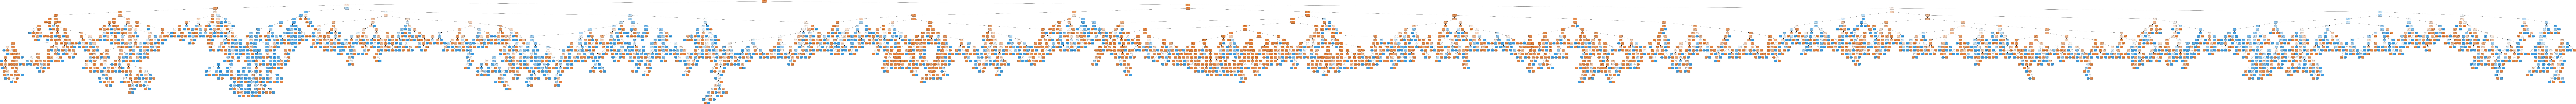

In [21]:
dst = DecisionTreeClassifier()

train_model(dst, X_train, X_test, y_train, y_test)

def visualize_tree(clf, class_name):
    dot_data = StringIO()
    tree.export_graphviz(
        clf,
        out_file=dot_data,
        class_names=class_name,
        filled=True,
        rounded=True,
        special_characters=True
    )
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

graph = visualize_tree(dst, ["0", "1"])
Image(graph.create_png())

### 5. Random Forest

In [22]:
randfor = RandomForestClassifier()

train_model(randfor, X_train, X_test, y_train, y_test)

==== training performance ====
accuracy score: 0.9999696509863429

==== test performance ====
accuracy score: 0.9167273610099539
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7341
           1       0.65      0.52      0.57       897

    accuracy                           0.92      8238
   macro avg       0.80      0.74      0.76      8238
weighted avg       0.91      0.92      0.91      8238

[[7090  251]
 [ 435  462]]


### 6. Naive Bayes

In [23]:
bayes = GaussianNB()

train_model(bayes, X_train, X_test, y_train, y_test)

==== training performance ====
accuracy score: 0.8467678300455235

==== test performance ====
accuracy score: 0.8452294246176256
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      7341
           1       0.37      0.61      0.46       897

    accuracy                           0.85      8238
   macro avg       0.66      0.74      0.69      8238
weighted avg       0.89      0.85      0.86      8238

[[6414  927]
 [ 348  549]]


## Analysis

Dari klasifikasi diatas maka dihasilkan kesimpunan:
1. Logistic Regression
   Accuracy = 91%
2. KNN
   Accuracy = 91%
3. SVM
   Accuracy = 90%
4. Decision Tree 
   Accuracy = 89%
5. Random Forest
   Accuracy = 92%
6. Naive Bayes
   Accuracy = 84%
  
Berdasarkan hasil di atas maka dapat dikatakan Random Forest adalah classifier yang paling baik untuk case ini.